<a href="https://colab.research.google.com/github/SusimRoy/face-recognition/blob/master/clustering_models/Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

model = ResNet50(weights='imagenet', include_top=False)


In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN, KMeans

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

model = ResNet50(weights='imagenet', include_top=False)

In [ ]:
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_2')>]
[<KerasTensor: shape=(None, None, None, 2048) dtype=float32 (created by layer 'conv5_block3_out')>]


In [ ]:
def getEmbeddings(model, data):
    return model.predict(data)

In [ ]:
def getPaths(path="/content/drive/MyDrive/detect_imgs_results/"):
    paths = []
    for f in os.listdir(path):
        newpath = path+f
        paths.append(newpath)

    return paths
    

def openImage(path):
    img = Image.open(path)
    img = np.array(img)
    return img


paths = getPaths()
print(len(paths))

12913


In [ ]:
import concurrent

with concurrent.futures.ThreadPoolExecutor(max_workers=20) as exec:
    X = exec.map(openImage, paths)

print(X)

<generator object Executor.map.<locals>.result_iterator at 0x7fe1ddf52050>


In [ ]:
x = X
train = np.stack(x)
print(train.shape)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


(12913, 160, 160, 3)


In [ ]:
embeddings = getEmbeddings(model, train)

In [ ]:
print(embeddings.shape)
print(embeddings.shape[0])
embeddings=embeddings.reshape(12913, 5*5*2048)
print(embeddings.shape)

(12913, 5, 5, 2048)
12913
(12913, 51200)


In [ ]:
X = embeddings
from sklearn.decomposition import PCA
pca=PCA(n_components=5000).fit(X)
newX=pca.transform(X)
print(newX.shape)

(12913, 5000)


In [ ]:
import random
import scipy
from scipy.spatial import distance

d = 0
for i in range(newX.shape[0]):
    c1 = random.choice(newX)
    c2 = random.choice(newX)
    d += distance.euclidean(c1, c2)
d = d / int(newX.shape[0])
print(d)

374.8179672360559


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

eps = []
uniques = []

db = DBSCAN(eps=d/2).fit(newX)
dbLabels = db.labels_
print(metrics.silhouette_score(newX, dbLabels))


-0.15787987


In [ ]:
uniques=[]
uniques.append(np.unique(dbLabels))
print(uniques)

[array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125])]


In [ ]:
store = []
for i in range(126):
    store.append(np.where(dbLabels == i))

print(store[0])


(array([    0,     6,     7, ..., 12829, 12830, 12834]),)


In [ ]:
print(dbLabels)
print(np.unique(dbLabels))

[  0  -1  -1 ...  -1  -1 108]
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125]


(126, 5)
27 4


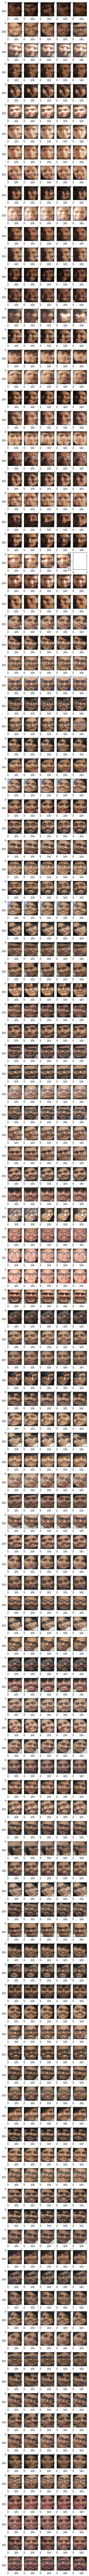

In [ ]:
fig, ax = plt.subplots(126, 5)
fig.set_figheight(200)
print(ax.shape)
c = 0
for i in range(126):
    for j in range(5):
        try:
            ax[i][j].imshow(np.array(train[store[i][0][j]]))
        except:
            print(i, j)
            break
    c+=1


plt.show()